In [1]:
#Célula de leitura dos dados resultantes dos procedimentos do módulo 1.

import pandas as pd

dtypes = {"COD_TARIF":"int16",
          "REGIAO":"category",
          "COD_MODELO":"category",
          "ANO_MODELO":"int16",
          "IDADE_MODELO":"int16",
          "SEXO":"category",
          "IDADE":"int16",
          "EXPOSICAO1":"float32",
          "PREMIO1":"float32",
          "IS_MEDIA":"float32",
          "FREQ_SIN1":"int16",
          "INDENIZ1":"int32",
          "FREQ_SIN2":"int16",
          "INDENIZ2":"int32",
          "FREQ_SIN3":"int16",
          "INDENIZ3":"int32",
          "FREQ_SIN4":"int16",
          "INDENIZ4":"int32",
          "FREQ_SIN9":"int16",
          "INDENIZ9":"int32",
          "ENVIO":"category"}

arquivos_carros = pd.read_csv(r"C:\Users\junio\OneDrive\Área de Trabalho\ARTE DOS DADOS\PROJETO 1\DADOS SUSEP\arquivos_carro.csv", dtype=dtypes,sep = ";", index_col=False)

In [2]:
arquivos_carros["SEXO"] = arquivos_carros["SEXO"].replace("0","J") #Durante a manipulação do dados Verificou-se que vários registros possuiam inconsistências. Para evitar problemas nas análises dos dados: 
arquivos_carros = arquivos_carros.drop(arquivos_carros[arquivos_carros["IDADE_MODELO"] < -1].index) #Devido a erros de preenchimento no banco, vários registros constavam a idade do veículo como < -1, o que não faz sentido.
arquivos_carros = arquivos_carros.drop(arquivos_carros[arquivos_carros["COD_MODELO"] == "999999-9"].index) #Remoção dos registros em que o modelo do veículo não está definido
arquivos_carros = arquivos_carros.drop(arquivos_carros[arquivos_carros["IDADE_MODELO"] > 25].index) #Remoção dos veículos que possuem mais de 25 anos. Ação derivada da política de subcrição definida no módulo 1.
arquivos_carros = arquivos_carros.drop(arquivos_carros[arquivos_carros["IDADE"] == 0].index) #Remoção dos registros em que a Idade do segurado não está informada.
arquivos_carros["ENVIO"] = arquivos_carros["ENVIO"].str[0:4] #remoção do caracter que determina o semestre do ano.

In [4]:
len(arquivos_carros)

23225238

In [3]:
arquivos_carros.to_csv(r"\Users\junio\OneDrive\Área de Trabalho\ARTE DOS DADOS\PROJETO 1\DADOS SUSEP\arquivos_carros_M.csv", sep=";", index=False)

In [ ]:
#Criação de um banco de dados P&L Operacional para os anos de 2012 a 2019.

PEL_OPER = {"ANO":["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"],
            "PREMIO_GANHO":[arquivos_carros[arquivos_carros["ENVIO"] == "2012"]["PREMIO1"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2013"]["PREMIO1"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2014"]["PREMIO1"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2015"]["PREMIO1"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2016"]["PREMIO1"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2017"]["PREMIO1"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2018"]["PREMIO1"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2019"]["PREMIO1"].sum()],
            "SIN_INCORRIDO":[arquivos_carros[arquivos_carros["ENVIO"] == "2012"]["INDENIZ_T"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2013"]["INDENIZ_T"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2014"]["INDENIZ_T"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2015"]["INDENIZ_T"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2016"]["INDENIZ_T"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2017"]["INDENIZ_T"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2018"]["INDENIZ_T"].sum(),
                       arquivos_carros[arquivos_carros["ENVIO"] == "2019"]["INDENIZ_T"].sum()],
            "DESP_AQUISICAO":[(arquivos_carros[arquivos_carros["ENVIO"] == "2012"]["PREMIO1"].sum()) * 0.2,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2013"]["PREMIO1"].sum()) * 0.2,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2014"]["PREMIO1"].sum()) * 0.2,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2015"]["PREMIO1"].sum()) * 0.2,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2016"]["PREMIO1"].sum()) * 0.2,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2017"]["PREMIO1"].sum()) * 0.2,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2018"]["PREMIO1"].sum()) * 0.2,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2019"]["PREMIO1"].sum()) * 0.2,],
            "DESP_ADMIN":[(arquivos_carros[arquivos_carros["ENVIO"] == "2012"]["PREMIO1"].sum()) * 0.15,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2013"]["PREMIO1"].sum()) * 0.15,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2014"]["PREMIO1"].sum()) * 0.15,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2015"]["PREMIO1"].sum()) * 0.15,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2016"]["PREMIO1"].sum()) * 0.15,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2017"]["PREMIO1"].sum()) * 0.15,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2018"]["PREMIO1"].sum()) * 0.15,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2019"]["PREMIO1"].sum()) * 0.15,],
            "DESP_TRIBUTOS":[(arquivos_carros[arquivos_carros["ENVIO"] == "2012"]["PREMIO1"].sum()) * 0.03,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2013"]["PREMIO1"].sum()) * 0.03,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2014"]["PREMIO1"].sum()) * 0.03,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2015"]["PREMIO1"].sum()) * 0.03,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2016"]["PREMIO1"].sum()) * 0.03,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2017"]["PREMIO1"].sum()) * 0.03,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2018"]["PREMIO1"].sum()) * 0.03,
                              (arquivos_carros[arquivos_carros["ENVIO"] == "2019"]["PREMIO1"].sum()) * 0.03,]}

PEL_OPER["LUCRO_OPER"] = PEL_OPER["PREMIO_GANHO"] - (PEL_OPER["SIN_INCORRIDO"] + PEL_OPER["DESP_ADMIN"] + PEL_OPER["DESP_AQUISICAO"] + PEL_OPER["DESP_TRIBUTOS"])
PEL_OPER = pd.DataFrame(PEL_OPER)

In [ ]:
#Obtenção dos KPIs de cada ano. Inserção dessas informações em uma tabela .csv.

PEL_OPER["SINISTRALIDADE"] = PEL_OPER["SIN_INCORRIDO"] / PEL_OPER["PREMIO_GANHO"]
PEL_OPER["DESP_AQUISICAO%"] = PEL_OPER["DESP_AQUISICAO"] / PEL_OPER["PREMIO_GANHO"]
PEL_OPER["DESP_ADMIN%"] = PEL_OPER["DESP_ADMIN"] / PEL_OPER["PREMIO_GANHO"]
PEL_OPER["DESP_TRIBUTOS%"] = PEL_OPER["DESP_TRIBUTOS"] / PEL_OPER["PREMIO_GANHO"]
PEL_OPER["IND_COMB"] = 1 - (PEL_OPER["LUCRO_OPER"] / PEL_OPER["PREMIO_GANHO"])

KPIs = PEL_OPER[["ANO","SINISTRALIDADE","DESP_AQUISICAO%","DESP_ADMIN%","DESP_TRIBUTOS%","IND_COMB"]]
KPIs.to_csv(r"C:\Users\junio\OneDrive\Área de Trabalho\ARTE DOS DADOS\PROJETO 1\KPIs.csv", sep=";", index=False)
PEL_OPER.to_csv(r"C:\Users\junio\OneDrive\Área de Trabalho\ARTE DOS DADOS\PROJETO 1\P&L_OPERACIONAL.csv", sep=";", index=False)

In [101]:
PEL_OPER.head(8)

,ANO,PREMIO_GANHO,SIN_INCORRIDO,DESP_AQUISICAO,DESP_ADMIN,DESP_TRIBUTOS,LUCRO_OPER
0,2012,1.082253e+10,6522268377,2.164506e+09,1.623379e+09,3.246758e+08,1.876990e+08
1,2013,1.222043e+10,7099386313,2.444087e+09,1.833065e+09,3.666130e+08,4.772824e+08
2,2014,1.379746e+10,7724080823,2.759492e+09,2.069619e+09,4.139238e+08,8.303444e+08
3,2015,1.414515e+10,8100664746,2.829029e+09,2.121772e+09,4.243544e+08,6.693257e+08
4,2016,1.422344e+10,8315347699,2.844689e+09,2.133517e+09,4.267033e+08,5.031882e+08
5,2017,1.446443e+10,9198090928,2.892886e+09,2.169664e+09,4.339329e+08,-2.301449e+08
6,2018,1.540119e+10,8442856666,3.080237e+09,2.310178e+09,4.620356e+08,1.105879e+09
7,2019,1.559647e+10,8280770509,3.119295e+09,2.339471e+09,4.678942e+08,1.389044e+09


In [102]:
KPIs.head(8)

,ANO,SINISTRALIDADE,DESP_AQUISICAO%,DESP_ADMIN%,DESP_TRIBUTOS%,IND_COMB
0,2012,0.60,0.2,0.15,0.03,0.982657
1,2013,0.58,0.2,0.15,0.03,0.960944
2,2014,0.56,0.2,0.15,0.03,0.939819
3,2015,0.57,0.2,0.15,0.03,0.952682
4,2016,0.58,0.2,0.15,0.03,0.964623
5,2017,0.64,0.2,0.15,0.03,1.015911
6,2018,0.55,0.2,0.15,0.03,0.928195
7,2019,0.53,0.2,0.15,0.03,0.910939


In [3]:
#Todas as linhas de códigos a seguir são inserções de informações registro por registro no banco "arquivos_carros".

#Criação de um coluna que soma o valor dos sinistros por registros. E uma coluna que verifica a quantidade de sinistros por registro.

arquivos_carros["INDENIZ_T"] = arquivos_carros["INDENIZ1"] + arquivos_carros["INDENIZ2"] + arquivos_carros["INDENIZ3"] + arquivos_carros["INDENIZ4"]
arquivos_carros["FREQ_SIN_T"] = arquivos_carros["FREQ_SIN1"] + arquivos_carros["FREQ_SIN2"] + arquivos_carros["FREQ_SIN3"] + arquivos_carros["FREQ_SIN4"]

#Criação de uma coluna "PREMIO_MEDIO". Para cada registro do banco será tomada a razão de "PREMIO1" por "EXPOSICAO1".

arquivos_carros["PREMIO_MEDIO"] = arquivos_carros["PREMIO1"] / arquivos_carros["EXPOSICAO1"]

#Criação de uma coluna "SEVERIDADE". Para cada registro do banco será tomada a razão entre "INDENIZ_T" por "FREQ_SIN_T".

arquivos_carros["SEVERIDADE"] = arquivos_carros["INDENIZ_T"] / arquivos_carros["FREQ_SIN_T"]
arquivos_carros["SEVERIDADE"] = arquivos_carros["SEVERIDADE"].fillna(0)

#Criação de uma coluna "FREQUENCIA". Para cada registro do banco será tomada a razão entre "FREQ_SIN_T" por "EXPOSICAO1".

arquivos_carros["FREQUENCIA"] = arquivos_carros["FREQ_SIN_T"] / arquivos_carros["EXPOSICAO1"]

#Criação de uma coluna "PREMIO_RISCO".

arquivos_carros["PREMIO_RISCO"] = arquivos_carros["SEVERIDADE"] * arquivos_carros["FREQUENCIA"]

#Criação de uma coluna "SINISTRALIDADE"

arquivos_carros["SINIS1"] = arquivos_carros["PREMIO_RISCO"] / arquivos_carros["PREMIO_MEDIO"] 
arquivos_carros["SINIS2"] = arquivos_carros["INDENIZ_T"] / arquivos_carros["PREMIO1"]
'''As duas formas anteriores são equivalentes.'''

'As duas formas anteriores são equivalentes.'

In [97]:
arquivos_carros.head()

,Unnamed: 0.1,Unnamed: 0,COD_TARIF,REGIAO,COD_MODELO,ANO_MODELO,IDADE_MODELO,SEXO,IDADE,EXPOSICAO1,...,INDENIZ9,ENVIO,INDENIZ_T,FREQ_SIN_T,PREMIO_MEDIO,SEVERIDADE,FREQUENCIA,PREMIO_RISCO,SINIS1,SINIS2
0,0,0,1,1,004032-0,2000,12,M,1,0.720548,...,0,2012,0,0,709.984192,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1,004032-0,2000,12,M,2,3.810959,...,0,2012,0,0,808.088806,0.0,0.0,0.0,0.0,0.0
2,2,2,1,1,004032-0,2000,12,M,3,2.520548,...,0,2012,0,0,643.934998,0.0,0.0,0.0,0.0,0.0
3,3,3,1,1,004032-0,2000,12,M,4,1.345205,...,0,2012,0,0,512.136597,0.0,0.0,0.0,0.0,0.0
4,4,4,1,1,004032-0,2000,12,M,5,2.063014,...,0,2012,0,0,563.966980,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Para obter as informações  ano a ano de frequência, severidade, sinistralidade, prêmio médio e prémio risco criou-se uma "máscara" 
#que obtem apenas os registros do banco original que possuem a soma dos registro 1, 2, 3, e 4 diferentes de 0.
#As informações obtidas para cada ano foram gravadas no banco de dados descrito abaixo.

mask = arquivos_carros["FREQUENCIA"] != 0

df = arquivos_carros[mask]
df.head()

INFO = {"ANO":["2012","2013","2014","2015","2016","2017","2018","2019"],
        "FREQ_SIN_ANO":[df[df["ENVIO"] == "2012"]["FREQ_SIN_T"].sum(),
                       df[df["ENVIO"] == "2013"]["FREQ_SIN_T"].sum(),
                       df[df["ENVIO"] == "2014"]["FREQ_SIN_T"].sum(),
                       df[df["ENVIO"] == "2015"]["FREQ_SIN_T"].sum(),
                       df[df["ENVIO"] == "2016"]["FREQ_SIN_T"].sum(),
                       df[df["ENVIO"] == "2017"]["FREQ_SIN_T"].sum(),
                       df[df["ENVIO"] == "2018"]["FREQ_SIN_T"].sum(),
                       df[df["ENVIO"] == "2019"]["FREQ_SIN_T"].sum()],
        "EXPOSICAO1":[arquivos_carros[arquivos_carros["ENVIO"] == "2012"]["EXPOSICAO1"].sum(),
                      arquivos_carros[arquivos_carros["ENVIO"] == "2013"]["EXPOSICAO1"].sum(),
                      arquivos_carros[arquivos_carros["ENVIO"] == "2014"]["EXPOSICAO1"].sum(),
                      arquivos_carros[arquivos_carros["ENVIO"] == "2015"]["EXPOSICAO1"].sum(),
                      arquivos_carros[arquivos_carros["ENVIO"] == "2016"]["EXPOSICAO1"].sum(),
                      arquivos_carros[arquivos_carros["ENVIO"] == "2017"]["EXPOSICAO1"].sum(),
                      arquivos_carros[arquivos_carros["ENVIO"] == "2018"]["EXPOSICAO1"].sum(),
                      arquivos_carros[arquivos_carros["ENVIO"] == "2019"]["EXPOSICAO1"].sum()],
        "FREQUENCIA":[df[df["ENVIO"] == "2012"]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["ENVIO"] == "2012"]["EXPOSICAO1"].sum(),
                      df[df["ENVIO"] == "2013"]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["ENVIO"] == "2013"]["EXPOSICAO1"].sum(),
                      df[df["ENVIO"] == "2014"]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["ENVIO"] == "2014"]["EXPOSICAO1"].sum(),
                      df[df["ENVIO"] == "2015"]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["ENVIO"] == "2015"]["EXPOSICAO1"].sum(),
                      df[df["ENVIO"] == "2016"]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["ENVIO"] == "2016"]["EXPOSICAO1"].sum(),
                      df[df["ENVIO"] == "2017"]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["ENVIO"] == "2017"]["EXPOSICAO1"].sum(),
                      df[df["ENVIO"] == "2018"]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["ENVIO"] == "2018"]["EXPOSICAO1"].sum(),
                      df[df["ENVIO"] == "2019"]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["ENVIO"] == "2019"]["EXPOSICAO1"].sum()]}

INFO["SEVERIDADE"] = PEL_OPER["SIN_INCORRIDO"] / INFO["FREQ_SIN_ANO"]
INFO["PREMIO_MEDIO"] = PEL_OPER["PREMIO_GANHO"] / INFO["EXPOSICAO1"]
INFO["PREMIO_RISCO"] = INFO["SEVERIDADE"] * INFO["FREQUENCIA"]
INFO = pd.DataFrame(INFO)


In [100]:
INFO.head(8)

,ANO,FREQ_SIN_ANO,EXPOSICAO1,FREQUENCIA,SEVERIDADE,PREMIO_MEDIO,PREMIO_RISCO
0,2012,903529,11406438.0,0.079212,7218.659697,948.808734,571.805885
1,2013,1031151,11717872.0,0.077107,6884.914346,1042.888419,530.874529
2,2014,1028243,12180048.0,0.074181,7511.921621,1132.791923,557.242388
3,2015,1006812,12180048.0,0.074181,8045.856372,1161.337459,596.850239
4,2016,959503,12079728.0,0.074797,8666.307139,1177.464012,648.214912
5,2017,991444,12537830.0,0.072064,9277.468952,1153.662875,668.573608
6,2018,853016,12317876.0,0.073351,9897.653345,1250.311823,726.003154
7,2019,813033,12408846.0,0.072813,10185.036166,1256.883517,741.606072


In [ ]:
#Do banco original são copiadas as colunas "IDADE_MODELO","INDENIZ_T" e "PREMIO1". Agrupa-se os dados em relação a todas as classes possíveis
#de IDADE_MODELO. Com base em cada possível valor de idade calcula-se a sinistralidade associada.

IDADE_X_SIN = arquivos_carros[["IDADE_MODELO","INDENIZ_T","PREMIO1"]]
IDADE_X_SIN = IDADE_X_SIN.groupby("IDADE_MODELO").sum()
IDADE_X_SIN["SINISTRALIDADE"] = IDADE_X_SIN["INDENIZ_T"] / IDADE_X_SIN["PREMIO1"]
IDADE_X_SIN = IDADE_X_SIN.drop(columns=["INDENIZ_T","PREMIO1"])

#O procedimento "groupby" gerou um erro na coluna "IDADE_MODELO". A coluna não constava mais no dataframe após o agrupamento. A linha de código a
#a seguir é só a retribuição dos valores perdidos a variável "IDADE_MODELO"

IDADE_X_SIN["IDADE_MODELO"] = [-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

#Mesmo procedimento realizado anteriormente com as mudanças necessárias para obtenção da frequência para cada idade de veículo possível.

IDADE_X_FREQ = arquivos_carros[["IDADE_MODELO","FREQ_SIN_T","EXPOSICAO1"]]
IDADE_X_FREQ = IDADE_X_FREQ.groupby("IDADE_MODELO").sum()
IDADE_X_FREQ["IDADE_MODELO"] = [-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
IDADE_X_FREQ["FREQUENCIA"] = IDADE_X_FREQ["FREQ_SIN_T"] / IDADE_X_FREQ["EXPOSICAO1"]
IDADE_X_FREQ = IDADE_X_FREQ.drop(columns=["FREQ_SIN_T","EXPOSICAO1"])

IDADE_X_SEVER = arquivos_carros[["IDADE_MODELO","FREQ_SIN_T","INDENIZ_T"]]
IDADE_X_SEVER = IDADE_X_SEVER.groupby("IDADE_MODELO").sum()
IDADE_X_SEVER["IDADE_MODELO"] = [-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
IDADE_X_SEVER["SEVERIDADE"] = IDADE_X_SEVER["INDENIZ_T"] / IDADE_X_SEVER["FREQ_SIN_T"]
IDADE_X_SEVER = IDADE_X_SEVER.drop(columns=["FREQ_SIN_T","INDENIZ_T"])

IDADE_X_PREMIO_RISCO = IDADE_X_SEVER[["SEVERIDADE","IDADE_MODELO"]]
IDADE_X_PREMIO_RISCO["FREQUENCIA"] = IDADE_X_FREQ["FREQUENCIA"]
IDADE_X_PREMIO_RISCO["PREMIO_RISCO"] = IDADE_X_PREMIO_RISCO["SEVERIDADE"] * IDADE_X_PREMIO_RISCO["FREQUENCIA"]
IDADE_X_PREMIO_RISCO = IDADE_X_PREMIO_RISCO.drop(columns=["FREQUENCIA","SEVERIDADE"])

IDADE_X_PREMIO_MEDIO = arquivos_carros[["IDADE_MODELO","PREMIO1","EXPOSICAO1"]]
IDADE_X_PREMIO_MEDIO = IDADE_X_PREMIO_MEDIO.groupby("IDADE_MODELO").sum()
IDADE_X_PREMIO_MEDIO["IDADE_MODELO"] = [-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
IDADE_X_PREMIO_MEDIO["PREMIO_MEDIO"] = IDADE_X_PREMIO_MEDIO["PREMIO1"] / IDADE_X_PREMIO_MEDIO["EXPOSICAO1"]
IDADE_X_PREMIO_MEDIO = IDADE_X_PREMIO_MEDIO.drop(columns=["PREMIO1","EXPOSICAO1"])



In [11]:
IDADE_X_SEVER.head(10)

,IDADE_MODELO,SEVERIDADE
IDADE_MODELO,,
-1,-1,7701.899559
0,0,7738.174375
1,1,7969.204085
2,2,8214.760284
3,3,8417.254618
4,4,8540.592468
5,5,8633.000348
6,6,8621.886430
7,7,8594.777546


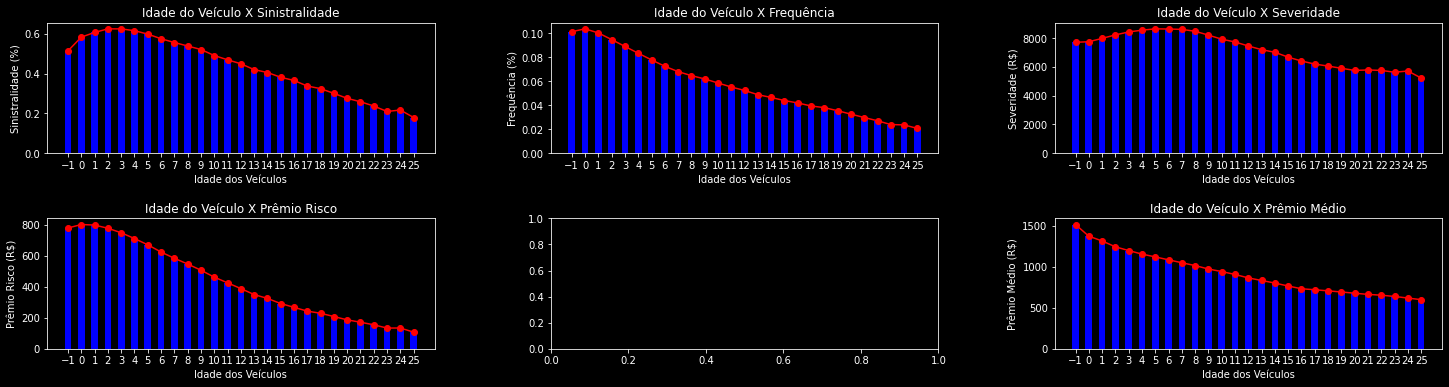

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#GRÁFICO: "Idade do Veículo X Sinistralidade"

IDADE = IDADE_X_SIN["IDADE_MODELO"]
SINISTRALIDADE = IDADE_X_SIN["SINISTRALIDADE"]

fig, axs = plt.subplots(2, 3, figsize=(25,6))

axs[0,0].set_xticks(np.arange(-1, 26, 1))
axs[0,0].plot(IDADE, SINISTRALIDADE, marker="o",color="red")
axs[0,0].bar(IDADE, SINISTRALIDADE,color="blue", width=0.5)
axs[0,0].set_xlabel("Idade dos Veículos")
axs[0,0].set_ylabel("Sinistralidade (%)")
axs[0,0].set_title("Idade do Veículo X Sinistralidade")

#GRÁFICO: "Idade do Veículo X Frequência"

IDADE = IDADE_X_FREQ["IDADE_MODELO"]
SINISTRALIDADE = IDADE_X_FREQ["FREQUENCIA"]

axs[0,1].set_xticks(np.arange(-1, 26, 1))
axs[0,1].plot(IDADE, SINISTRALIDADE, marker="o",color="red")
axs[0,1].bar(IDADE, SINISTRALIDADE,color="blue", width=0.5)
axs[0,1].set_xlabel("Idade dos Veículos")
axs[0,1].set_ylabel("Frequência (%)")
axs[0,1].set_title("Idade do Veículo X Frequência")

#GRÁFICOS: "Idade do Veículo X Severidade"

IDADE = IDADE_X_SEVER["IDADE_MODELO"]
SEVERIDADE = IDADE_X_SEVER["SEVERIDADE"]

axs[0,2].set_xticks(np.arange(-1, 26, 1))
axs[0,2].plot(IDADE, SEVERIDADE, marker="o",color="red")
axs[0,2].bar(IDADE, SEVERIDADE,color="blue", width=0.5)
axs[0,2].set_xlabel("Idade dos Veículos")
axs[0,2].set_ylabel("Severidade (R$)")
axs[0,2].set_title("Idade do Veículo X Severidade")

#GRÁFICOS "Idade do Veículo X Prêmio Risco"

IDADE = IDADE_X_PREMIO_RISCO["IDADE_MODELO"]
PREMIO_RISCO = IDADE_X_PREMIO_RISCO["PREMIO_RISCO"]

axs[1,0].set_xticks(np.arange(-1, 26, 1))
axs[1,0].plot(IDADE, PREMIO_RISCO, marker="o",color="red")
axs[1,0].bar(IDADE, PREMIO_RISCO, color="blue", width=0.5)
axs[1,0].set_xlabel("Idade dos Veículos")
axs[1,0].set_ylabel("Prêmio Risco (R$)")
axs[1,0].set_title("Idade do Veículo X Prêmio Risco")

#GRÁFICOS "Idade do Veículo X Prêmio Médio"

IDADE = IDADE_X_PREMIO_RISCO["IDADE_MODELO"]
PREMIO_MEDIO = IDADE_X_PREMIO_MEDIO["PREMIO_MEDIO"]

axs[1,2].set_xticks(np.arange(-1, 26, 1))
axs[1,2].plot(IDADE, PREMIO_MEDIO, marker="o",color="red")
axs[1,2].bar(IDADE, PREMIO_MEDIO, color="blue", width=0.5)
axs[1,2].set_xlabel("Idade dos Veículos")
axs[1,2].set_ylabel("Prêmio Médio (R$)")
axs[1,2].set_title("Idade do Veículo X Prêmio Médio")

plt.subplots_adjust(hspace=0.5, wspace=0.3)


In [6]:
#A partir dessa célula são calculadas frequência, severidade, sinistralidade, prêmio médio e prémio risco para cada sexo. Por algum motivo
#ainda não descoberto a classe sexo "J = Jurídico" não possui sinistros registralos, sendo que para todos os registro desse tipo a frequência de sinistro
#1, 2, 3 e 4 está zerada.
#Como descrito anteriomente a função do pandas "groupby" estava gerando erros no dataset. Para solucionar esse problema, realizou-se o agrupamento de forma manual.

SEXO_X_FREQ = {"SEXO":["F","M","J"],
                "FREQUENCIA":[(arquivos_carros[arquivos_carros["SEXO"] == "F"]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["SEXO"] == "F"]["EXPOSICAO1"].sum()) * 100,
                              (arquivos_carros[arquivos_carros["SEXO"] == "M"]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["SEXO"] == "M"]["EXPOSICAO1"].sum()) * 100,
                              (arquivos_carros[arquivos_carros["SEXO"] == "J"]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["SEXO"] == "J"]["EXPOSICAO1"].sum()) * 100]}

SEXO_X_FREQ = pd.DataFrame(SEXO_X_FREQ)
SEXO_X_FREQ["FREQUENCIA"] = SEXO_X_FREQ["FREQUENCIA"].round(2)
SEXO_X_FREQ.head()

#Mesmo procedimento de cima, com as modificações apropriadas para a obtenção da sinistralidade por sexo.

SEXO_X_SIN = {"SEXO":["F","M","J"],
                "SINISTRALIDADE":[(arquivos_carros[arquivos_carros["SEXO"] == "F"]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["SEXO"] == "F"]["PREMIO1"].sum()) * 100,
                                  (arquivos_carros[arquivos_carros["SEXO"] == "M"]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["SEXO"] == "M"]["PREMIO1"].sum()) * 100,
                                  (arquivos_carros[arquivos_carros["SEXO"] == "J"]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["SEXO"] == "J"]["PREMIO1"].sum()) * 100]}

SEXO_X_SIN = pd.DataFrame(SEXO_X_SIN)
SEXO_X_SIN["SINISTRALIDADE"] = SEXO_X_SIN["SINISTRALIDADE"].round(2)
SEXO_X_SIN.head()

SEXO_X_SEV = {"SEXO":["F","M","J"],
                "SEVERIDADE":[(arquivos_carros[arquivos_carros["SEXO"] == "F"]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["SEXO"] == "F"]["FREQ_SIN_T"].sum()),
                              (arquivos_carros[arquivos_carros["SEXO"] == "M"]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["SEXO"] == "M"]["FREQ_SIN_T"].sum()),
                              (arquivos_carros[arquivos_carros["SEXO"] == "J"]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["SEXO"] == "J"]["FREQ_SIN_T"].sum())]}

SEXO_X_SEV = pd.DataFrame(SEXO_X_SEV)
SEXO_X_SEV["SEVERIDADE"] = SEXO_X_SEV["SEVERIDADE"].round(2)
SEXO_X_SEV.head()

#Como já foi calculada a frequência e severidade por sexo anteriormente, para obtenção do "PREMIO_RISCO" bastou a combinação dos dataframes.

SEXO_X_PR = {"SEXO":["F","M","J"]}

SEXO_X_PR = pd.DataFrame(SEXO_X_PR)
SEXO_X_PR["PREMIO_RISCO"] = (SEXO_X_FREQ["FREQUENCIA"] / 100) * SEXO_X_SEV["SEVERIDADE"]
SEXO_X_PR["PREMIO_RISCO"] = SEXO_X_PR["PREMIO_RISCO"].round(2)
SEXO_X_PR.head()

SEXO_X_PM = {"SEXO":["F","M","J"],
                "PREMIO_MEDIO":[(arquivos_carros[arquivos_carros["SEXO"] == "F"]["PREMIO1"].sum() / arquivos_carros[arquivos_carros["SEXO"] == "F"]["EXPOSICAO1"].sum()),
                                (arquivos_carros[arquivos_carros["SEXO"] == "M"]["PREMIO1"].sum() / arquivos_carros[arquivos_carros["SEXO"] == "M"]["EXPOSICAO1"].sum()),
                                (arquivos_carros[arquivos_carros["SEXO"] == "J"]["PREMIO1"].sum() / arquivos_carros[arquivos_carros["SEXO"] == "J"]["EXPOSICAO1"].sum())]}

SEXO_X_PM = pd.DataFrame(SEXO_X_PM)
SEXO_X_PM["PREMIO_MEDIO"] = SEXO_X_PM["PREMIO_MEDIO"].round(2)
SEXO_X_PM.head()

,SEXO,PREMIO_MEDIO
0,F,1079.530029
1,M,1178.099976
2,J,1493.569946


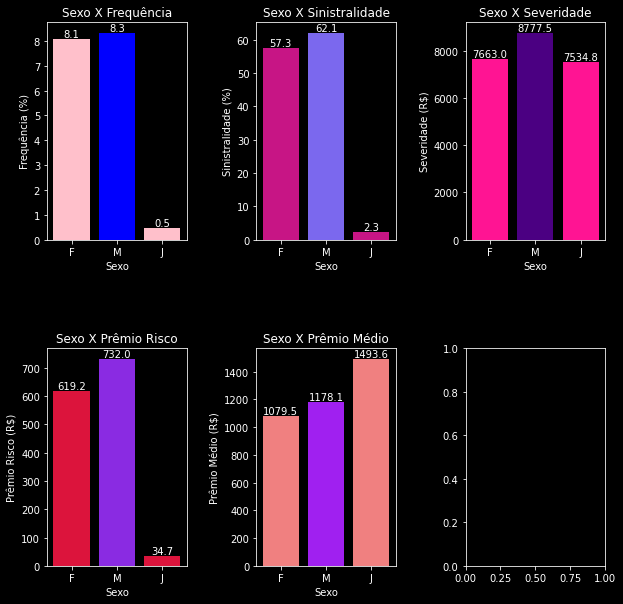

In [8]:
#GRÁFICO: "Sexo X Frequência"
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 3, figsize=(10,10))

SEXO = SEXO_X_FREQ["SEXO"]
FREQUENCIA = SEXO_X_FREQ["FREQUENCIA"]

GRF8 = axs[0,0].bar(SEXO, FREQUENCIA,color=["pink","blue"])
axs[0,0].set_xticks(SEXO)
axs[0,0].set_xlabel("Sexo")
axs[0,0].set_ylabel("Frequência (%)")
axs[0,0].set_title("Sexo X Frequência")
axs[0,0].bar_label(GRF8, fmt="%.01f", size=10, label_type="edge")

#GRÁFICO: "Sexo X Sinistralidade"

SEXO = SEXO_X_SIN["SEXO"]
SINISTRALIDADE = SEXO_X_SIN["SINISTRALIDADE"]

GRF11 = axs[0,1].bar(SEXO, SINISTRALIDADE,color=["#C71585","#7B68EE"])
axs[0,1].set_xticks(SEXO)
axs[0,1].set_xlabel("Sexo")
axs[0,1].set_ylabel("Sinistralidade (%)")
axs[0,1].set_title("Sexo X Sinistralidade")
axs[0,1].bar_label(GRF11, fmt="%.01f", size=10, label_type="edge")

    #GRÁFICO: "Sexo X Severidade"

SEXO = SEXO_X_SEV["SEXO"]
SEVERIDADE = SEXO_X_SEV["SEVERIDADE"]

GRF9 = axs[0,2].bar(SEXO, SEVERIDADE, color=["#FF1493","#4B0082"])
axs[0,2].set_xticks(SEXO)
axs[0,2].set_xlabel("Sexo")
axs[0,2].set_ylabel("Severidade (R$)")
axs[0,2].set_title("Sexo X Severidade")
axs[0,2].bar_label(GRF9, fmt="%.01f", size=10, label_type="edge")

#GRÁFICO: "Sexo X Prêmio Risco"

SEXO = SEXO_X_PR["SEXO"]
PREMIO_RISCO = SEXO_X_PR["PREMIO_RISCO"]

GRF10 = axs[1,0].bar(SEXO, PREMIO_RISCO, color=["#DC143C","#8A2BE2"])
axs[1,0].set_xticks(SEXO)
axs[1,0].set_xlabel("Sexo")
axs[1,0].set_ylabel("Prêmio Risco (R$)")
axs[1,0].set_title("Sexo X Prêmio Risco")
axs[1,0].bar_label(GRF10, fmt="%.01f", size=10, label_type="edge")

#GRÁFICO: "Sexo X Prêmio Médio"

SEXO = SEXO_X_PR["SEXO"]
PREMIO_MEDIO = SEXO_X_PM["PREMIO_MEDIO"]

GRF12 = axs[1,1].bar(SEXO, PREMIO_MEDIO, color=["#F08080","#A020F0"])
axs[1,1].set_xticks(SEXO)
axs[1,1].set_xlabel("Sexo")
axs[1,1].set_ylabel("Prêmio Médio (R$)")
axs[1,1].set_title("Sexo X Prêmio Médio")
axs[1,1].bar_label(GRF12, fmt="%.01f", size=10, label_type="edge")

plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [7]:
#Os gráficos que se seguem relacionam a Idade do Segurado com frequência, severidade, sinistralidade, prêmio médio e prémio risco. Aqui também utilizou-se
#o agrupamento dos dados por idade manualmente.

IDADEP_X_FREQ = {'IDADE':[1, 2, 3, 4, 5],
                 'FREQUENCIA':[(arquivos_carros[arquivos_carros["IDADE"] == 1]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 1]["EXPOSICAO1"].sum()) * 100,
                               (arquivos_carros[arquivos_carros["IDADE"] == 2]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 2]["EXPOSICAO1"].sum()) * 100,
                               (arquivos_carros[arquivos_carros["IDADE"] == 3]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 3]["EXPOSICAO1"].sum()) * 100,
                               (arquivos_carros[arquivos_carros["IDADE"] == 4]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 4]["EXPOSICAO1"].sum()) * 100,
                               (arquivos_carros[arquivos_carros["IDADE"] == 5]["FREQ_SIN_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 5]["EXPOSICAO1"].sum()) * 100]}

IDADEP_X_FREQ = pd.DataFrame(IDADEP_X_FREQ)
IDADEP_X_FREQ["FREQUENCIA"] = IDADEP_X_FREQ["FREQUENCIA"].round(2)
IDADEP_X_FREQ.head()

#Ao calcular a severidade por faixa de idade verifica-se que apesar da frequência de sinitro ser consideravelmtente maior para segurado com idade entre
#18 e 25 anos, a severidade dos dados é melhor nessa faixa de idade do que em qualquer outra.

IDADEP_X_SEV = {"IDADE":[1, 2, 3, 4, 5],
                "SEVERIDADE":[(arquivos_carros[arquivos_carros["IDADE"] == 1]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 1]["FREQ_SIN_T"].sum()),
                              (arquivos_carros[arquivos_carros["IDADE"] == 2]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 2]["FREQ_SIN_T"].sum()),
                              (arquivos_carros[arquivos_carros["IDADE"] == 3]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 3]["FREQ_SIN_T"].sum()),
                              (arquivos_carros[arquivos_carros["IDADE"] == 4]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 4]["FREQ_SIN_T"].sum()),
                              (arquivos_carros[arquivos_carros["IDADE"] == 5]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 5]["FREQ_SIN_T"].sum())]}

IDADEP_X_SEV = pd.DataFrame(IDADEP_X_SEV)
IDADEP_X_SEV["SEVERIDADE"] = IDADEP_X_SEV["SEVERIDADE"].round(2)
IDADEP_X_SEV.head()

#Procedimento de calculo da idade média do automóveis utilizando o filtro de idade do segurado.

IDADEP_IDADE_MODELO = {'IDADE SEGURADO':[1, 2, 3, 4, 5],
    "MEDIA_IDADE_AUTOMOVEL": [arquivos_carros[arquivos_carros["IDADE"] == 1]["IDADE_MODELO"].mean(),
                              arquivos_carros[arquivos_carros["IDADE"] == 2]["IDADE_MODELO"].mean(),
                              arquivos_carros[arquivos_carros["IDADE"] == 3]["IDADE_MODELO"].mean(),
                              arquivos_carros[arquivos_carros["IDADE"] == 4]["IDADE_MODELO"].mean(),
                              arquivos_carros[arquivos_carros["IDADE"] == 5]["IDADE_MODELO"].mean()],
    "DESVIO_PADRAO": [arquivos_carros[arquivos_carros["IDADE"] == 1]["IDADE_MODELO"].std(),
                      arquivos_carros[arquivos_carros["IDADE"] == 2]["IDADE_MODELO"].std(),
                      arquivos_carros[arquivos_carros["IDADE"] == 3]["IDADE_MODELO"].std(),
                      arquivos_carros[arquivos_carros["IDADE"] == 4]["IDADE_MODELO"].std(),
                      arquivos_carros[arquivos_carros["IDADE"] == 5]["IDADE_MODELO"].std()]}

IDADEP_IDADE_MODELO = pd.DataFrame(IDADEP_IDADE_MODELO)
IDADEP_IDADE_MODELO["MEDIA_IDADE_AUTOMOVEL"] = IDADEP_IDADE_MODELO["MEDIA_IDADE_AUTOMOVEL"].round(2)
IDADEP_IDADE_MODELO["DESVIO_PADRAO"] = IDADEP_IDADE_MODELO["DESVIO_PADRAO"].round(2)
IDADEP_IDADE_MODELO.head()

IDADEP_X_SIN = {"IDADE":[1, 2, 3, 4, 5],
                "SIN":[(arquivos_carros[arquivos_carros["IDADE"] == 1]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 1]["PREMIO1"].sum()) * 100,
                       (arquivos_carros[arquivos_carros["IDADE"] == 2]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 2]["PREMIO1"].sum()) * 100,
                       (arquivos_carros[arquivos_carros["IDADE"] == 3]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 3]["PREMIO1"].sum()) * 100,
                       (arquivos_carros[arquivos_carros["IDADE"] == 4]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 4]["PREMIO1"].sum()) * 100,
                       (arquivos_carros[arquivos_carros["IDADE"] == 5]["INDENIZ_T"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 5]["PREMIO1"].sum()) * 100]}
IDADEP_X_SIN = pd.DataFrame(IDADEP_X_SIN)
IDADEP_X_SIN["SIN"] = IDADEP_X_SIN["SIN"].round(2)
IDADEP_X_SIN.head()

IDADEP_X_PREMIO_M = {"IDADE":[1, 2, 3, 4, 5],
                     "PREMIO_MEDIO":[(arquivos_carros[arquivos_carros["IDADE"] == 1]["PREMIO1"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 1]["EXPOSICAO1"].sum()),
                                     (arquivos_carros[arquivos_carros["IDADE"] == 2]["PREMIO1"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 2]["EXPOSICAO1"].sum()),
                                     (arquivos_carros[arquivos_carros["IDADE"] == 3]["PREMIO1"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 3]["EXPOSICAO1"].sum()),
                                     (arquivos_carros[arquivos_carros["IDADE"] == 4]["PREMIO1"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 4]["EXPOSICAO1"].sum()),
                                     (arquivos_carros[arquivos_carros["IDADE"] == 5]["PREMIO1"].sum() / arquivos_carros[arquivos_carros["IDADE"] == 5]["EXPOSICAO1"].sum())]}
IDADEP_X_PREMIO_M = pd.DataFrame(IDADEP_X_PREMIO_M)
IDADEP_X_PREMIO_M["PREMIO_MEDIO"] = IDADEP_X_PREMIO_M["PREMIO_MEDIO"].round(2)
IDADEP_X_PREMIO_M.head()

IDADEP_PREMIO_R = {"IDADE":[1, 2, 3, 4, 5]}
IDADEP_PREMIO_R = pd.DataFrame(IDADEP_PREMIO_R)
IDADEP_PREMIO_R["PREMIO_RISCO"] = IDADEP_X_FREQ["FREQUENCIA"] * IDADEP_X_SEV["SEVERIDADE"]
IDADEP_PREMIO_R["PREMIO_RISCO"] = IDADEP_PREMIO_R["PREMIO_RISCO"].round(2)
IDADEP_PREMIO_R.head()

,IDADE,PREMIO_RISCO
0,1,87343.82
1,2,73477.62
2,3,68774.05
3,4,65200.30
4,5,57988.23


In [8]:
IDADEP_IDADE_MODELO.head()

,IDADE SEGURADO,MEDIA_IDADE_AUTOMOVEL,DESVIO_PADRAO
0,1,5.14,4.27
1,2,5.32,4.31
2,3,5.57,4.51
3,4,5.70,4.70
4,5,6.19,5.17


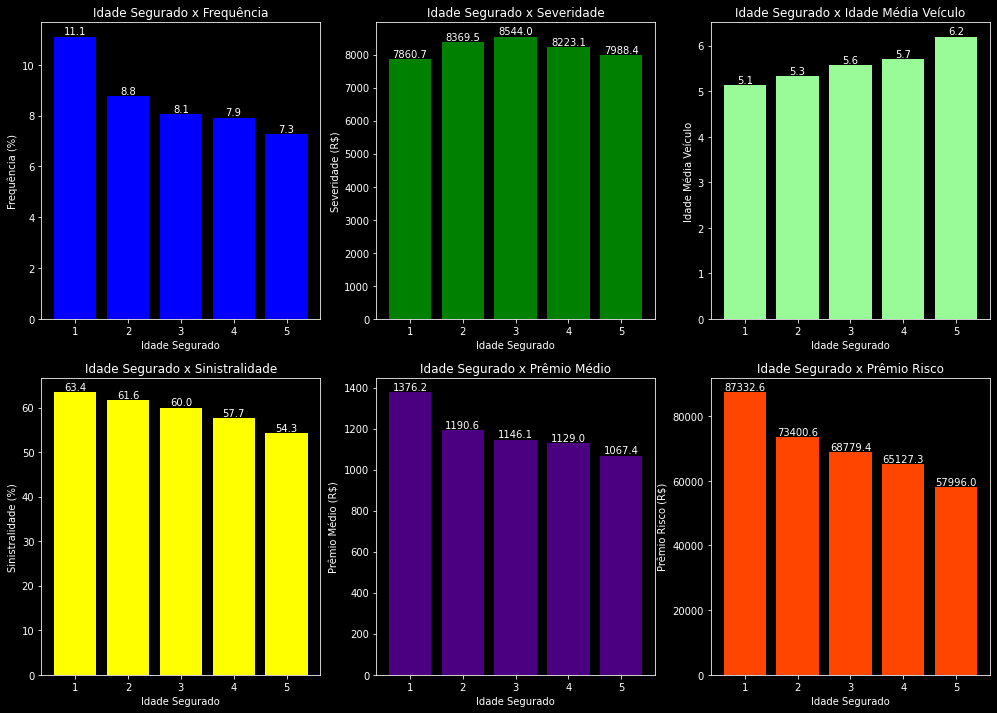

In [95]:
#GRÁFICO: "Idade Segurado x Frequência"
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 3, figsize=(17,12))

IDADE = IDADEP_X_FREQ["IDADE"]
FREQUENCIA = IDADEP_X_FREQ["FREQUENCIA"]

GRF1 = axs[0,0].bar(IDADE, FREQUENCIA, color="blue")
axs[0,0].set_xlabel("Idade Segurado")
axs[0,0].set_ylabel("Frequência (%)")
axs[0,0].set_title("Idade Segurado x Frequência")
axs[0,0].bar_label(GRF1, fmt="%.01f", size=10, label_type="edge")

#GRÁFICO: "Idade Segurado x Severidade"

IDADE = IDADEP_X_SEV["IDADE"]
SEVERIDADE = IDADEP_X_SEV["SEVERIDADE"]

GRF2 = axs[0,1].bar(IDADE, SEVERIDADE, color="green")
axs[0,1].set_xlabel("Idade Segurado")
axs[0,1].set_ylabel("Severidade (R$)")
axs[0,1].set_title("Idade Segurado x Severidade")
axs[0,1].bar_label(GRF2, fmt="%.01f", size=10, label_type="edge")

#GRÁFICO: Idade Segurado x Idade Média Veículo"

IDADE = IDADEP_IDADE_MODELO["IDADE SEGURADO"]
IDADE_MEDIA_AUT = IDADEP_IDADE_MODELO["MEDIA_IDADE_AUTOMOVEL"]

GRF3 = axs[0,2].bar(IDADE, IDADE_MEDIA_AUT, color="#98FB98")
axs[0,2].set_xlabel("Idade Segurado")
axs[0,2].set_ylabel("Idade Média Veículo")
axs[0,2].set_title("Idade Segurado x Idade Média Veículo")
axs[0,2].bar_label(GRF3, fmt="%.01f", size=10, label_type="edge")

#GRÁFICO: "Idade Segurado x Sinistralidade"

IDADE = IDADEP_X_SIN["IDADE"]
SINISTRALIDADE = IDADEP_X_SIN["SIN"]

GRF4 = axs[1,0].bar(IDADE, SINISTRALIDADE, color="yellow")
axs[1,0].set_xlabel("Idade Segurado")
axs[1,0].set_ylabel("Sinistralidade (%)")
axs[1,0].set_title("Idade Segurado x Sinistralidade")
axs[1,0].bar_label(GRF4, fmt="%.01f", size=10, label_type="edge")

#GRÁFICO: "Idade Segurado x Prêmio Médio"

IDADE = IDADEP_X_PREMIO_M["IDADE"]
PREMIO_MEDIO = IDADEP_X_PREMIO_M["PREMIO_MEDIO"]

GRF5 = axs[1,1].bar(IDADE, PREMIO_MEDIO, color="#4B0082")
axs[1,1].set_xlabel("Idade Segurado")
axs[1,1].set_ylabel("Prêmio Médio (R$)")
axs[1,1].set_title("Idade Segurado x Prêmio Médio")
axs[1,1].bar_label(GRF5, fmt="%.01f", size=10, label_type="edge")

#GRÁFICO: "Idade Segurado x Prêmio Risco"

IDADE = IDADEP_PREMIO_R["IDADE"]
PREMIO_RISCO = IDADEP_PREMIO_R["PREMIO_RISCO"]

GRF6 = axs[1,2].bar(IDADE, PREMIO_RISCO, color="#FF4500")
axs[1,2].set_xlabel("Idade Segurado")
axs[1,2].set_ylabel("Prêmio Risco (R$)")
axs[1,2].set_title("Idade Segurado x Prêmio Risco")
axs[1,2].bar_label(GRF6, fmt="%.01f", size=10, label_type="edge")

plt.subplots_adjust(hspace=0.2, wspace=0.2)

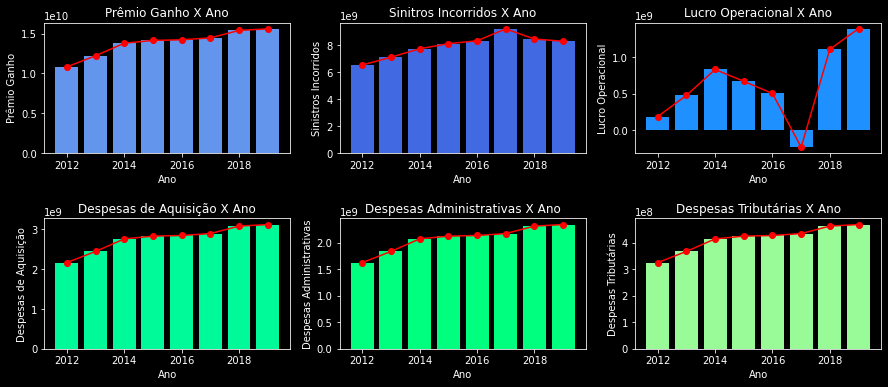

In [ ]:
#Leituras dos dados obtidos anteriormente para a criação de gráficos comparando os dados ano a ano.
import pandas as pd
import matplotlib.pyplot as plt

PEL_OPER = pd.read_csv(r"C:\Users\junio\OneDrive\Área de Trabalho\ARTE DOS DADOS\PROJETO 1\P&L_OPERACIONAL.csv", sep=";", index_col=False)
KPIs = pd.read_csv(r"C:\Users\junio\OneDrive\Área de Trabalho\ARTE DOS DADOS\PROJETO 1\KPIs.csv", sep=";", index_col=False)
INFO = pd.read_csv(r"C:\Users\junio\OneDrive\Área de Trabalho\ARTE DOS DADOS\PROJETO 1\INFO.csv", sep=";", index_col=False)

fig, axs = plt.subplots(2, 3, figsize=(15,6))

axs[0,0].bar(PEL_OPER["ANO"], PEL_OPER["PREMIO_GANHO"], color="#6495ED")
axs[0,0].plot(PEL_OPER["ANO"], PEL_OPER["PREMIO_GANHO"], color="red", marker="o")
axs[0,0].set_xlabel("Ano")
axs[0,0].set_ylabel("Prêmio Ganho")
axs[0,0].set_title("Prêmio Ganho X Ano")

axs[0,1].bar(PEL_OPER["ANO"], PEL_OPER["SIN_INCORRIDO"], color="#4169E1")
axs[0,1].plot(PEL_OPER["ANO"], PEL_OPER["SIN_INCORRIDO"], color="red", marker="o")
axs[0,1].set_xlabel("Ano")
axs[0,1].set_ylabel("Sinistros Incorridos")
axs[0,1].set_title("Sinitros Incorridos X Ano")

axs[0,2].bar(PEL_OPER["ANO"], PEL_OPER["LUCRO_OPER"], color="#1E90FF")
axs[0,2].plot(PEL_OPER["ANO"], PEL_OPER["LUCRO_OPER"], color="red", marker="o")
axs[0,2].set_xlabel("Ano")
axs[0,2].set_ylabel("Lucro Operacional")
axs[0,2].set_title("Lucro Operacional X Ano")

axs[1,0].bar(PEL_OPER["ANO"], PEL_OPER["DESP_AQUISICAO"], color="#00FA9A")
axs[1,0].plot(PEL_OPER["ANO"], PEL_OPER["DESP_AQUISICAO"], color="red", marker="o")
axs[1,0].set_xlabel("Ano")
axs[1,0].set_ylabel("Despesas de Aquisição")
axs[1,0].set_title("Despesas de Aquisição X Ano")

axs[1,1].bar(PEL_OPER["ANO"], PEL_OPER["DESP_ADMIN"], color="#00FF7F")
axs[1,1].plot(PEL_OPER["ANO"], PEL_OPER["DESP_ADMIN"], color="red", marker="o")
axs[1,1].set_xlabel("Ano")
axs[1,1].set_ylabel("Despesas Administrativas")
axs[1,1].set_title("Despesas Administrativas X Ano")

axs[1,2].bar(PEL_OPER["ANO"], PEL_OPER["DESP_TRIBUTOS"], color="#98FB98")
axs[1,2].plot(PEL_OPER["ANO"], PEL_OPER["DESP_TRIBUTOS"], color="red", marker="o")
axs[1,2].set_xlabel("Ano")
axs[1,2].set_ylabel("Despesas Tributárias")
axs[1,2].set_title("Despesas Tributárias X Ano")


plt.subplots_adjust(hspace=0.5) #Ajuste do espaçamento entre linhas

Text(0.5, 1.0, 'Índice Combinado X Ano')

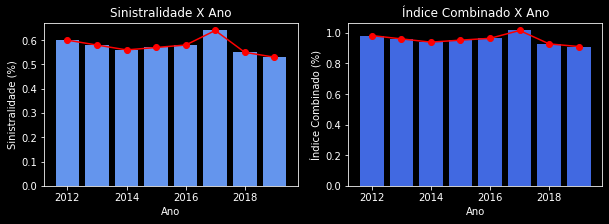

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

ax1.bar(KPIs["ANO"], KPIs["SINISTRALIDADE"], color="#6495ED")
ax1.plot(KPIs["ANO"], KPIs["SINISTRALIDADE"], color="red", marker="o")
ax1.set_xlabel("Ano")
ax1.set_ylabel("Sinistralidade (%)")
ax1.set_title("Sinistralidade X Ano")

ax2.bar(KPIs["ANO"], KPIs["IND_COMB"], color="#4169E1")
ax2.plot(KPIs["ANO"], KPIs["IND_COMB"], color="red", marker="o")
ax2.set_xlabel("Ano")
ax2.set_ylabel("Índice Combinado (%)")
ax2.set_title("Índice Combinado X Ano")

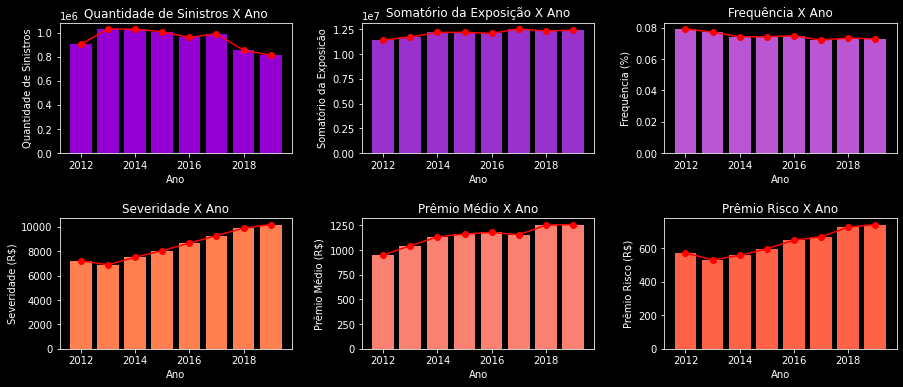

In [63]:
fig, axs = plt.subplots(2, 3, figsize=(15,6))

axs[0,0].bar(INFO["ANO"], INFO["FREQ_SIN_ANO"], color="#9400D3")
axs[0,0].plot(INFO["ANO"], INFO["FREQ_SIN_ANO"], color="red", marker="o")
axs[0,0].set_xlabel("Ano")
axs[0,0].set_ylabel("Quantidade de Sinistros")
axs[0,0].set_title("Quantidade de Sinistros X Ano")

axs[0,1].bar(INFO["ANO"], INFO["EXPOSICAO1"], color="#9932CC")
axs[0,1].plot(INFO["ANO"], INFO["EXPOSICAO1"], color="red", marker="o")
axs[0,1].set_xlabel("Ano")
axs[0,1].set_ylabel("Somatório da Exposicão")
axs[0,1].set_title("Somatório da Exposição X Ano")

axs[0,2].bar(INFO["ANO"], INFO["FREQUENCIA"], color="#BA55D3")
axs[0,2].plot(INFO["ANO"], INFO["FREQUENCIA"], color="red", marker="o")
axs[0,2].set_xlabel("Ano")
axs[0,2].set_ylabel("Frequência (%)")
axs[0,2].set_title("Frequência X Ano")

axs[1,0].bar(INFO["ANO"], INFO["SEVERIDADE"], color="#FF7F50")
axs[1,0].plot(INFO["ANO"], INFO["SEVERIDADE"], color="red", marker="o")
axs[1,0].set_xlabel("Ano")
axs[1,0].set_ylabel("Severidade (R$)")
axs[1,0].set_title("Severidade X Ano")

axs[1,1].bar(INFO["ANO"], INFO["PREMIO_MEDIO"], color="#FA8072")
axs[1,1].plot(INFO["ANO"], INFO["PREMIO_MEDIO"], color="red", marker="o")
axs[1,1].set_xlabel("Ano")
axs[1,1].set_ylabel("Prêmio Médio (R$)")
axs[1,1].set_title("Prêmio Médio X Ano")

axs[1,2].bar(INFO["ANO"], INFO["PREMIO_RISCO"], color="#FF6347")
axs[1,2].plot(INFO["ANO"], INFO["PREMIO_RISCO"], color="red", marker="o")
axs[1,2].set_xlabel("Ano")
axs[1,2].set_ylabel("Prêmio Risco (R$)")
axs[1,2].set_title("Prêmio Risco X Ano")

plt.subplots_adjust(hspace=0.5, wspace=0.3)